In [1]:
#This notebook will serve as a source of initial data analysis to try and determine useful features

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('../data/interim/nfl_pbp_next_scores.csv', low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417858 entries, 0 to 417857
Columns: 211 entries, Unnamed: 0 to next_score_drive
dtypes: float64(88), int64(24), object(99)
memory usage: 672.7+ MB


211 Raw Features, 417858 plays

### Initial Analysis of Features

In [23]:
df_yard = df[['yardline_100','next_score_type']]

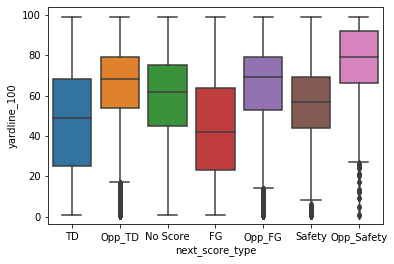

In [27]:
sns.boxplot(x='next_score_type', y='yardline_100', data=df_yard)

There is evidence that the yardline of a play can have an impact on the the next score type. Teams pinned near their own goal line (high yardline_100) are more likely to give up TDs, Safteys or FGs to the opponent which makes sense intuitevly. 

Plays that occur closer to midfield are more likely to end with the possesions team scoring

So yardline will be important to a model predicting expected points from a play

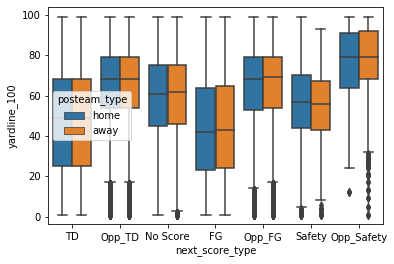

In [30]:
sns.boxplot(x='next_score_type', y='yardline_100', data=df, hue='posteam_type')

Home and Away teams do not appear to effect the next score type

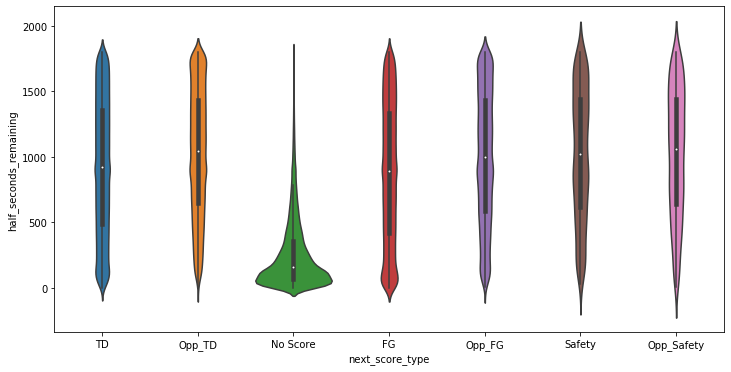

In [49]:
plt.figure(figsize=(12,6))
sns.violinplot(x='next_score_type', y='half_seconds_remaining', data=df)

There is some variation in the distribution of seconds remaining for most of the next score types but it is not very large except for no score which mostly occurs near the end of halfs (as expected) So this will be a useful feature although something like a two min warning feature might be more useful.

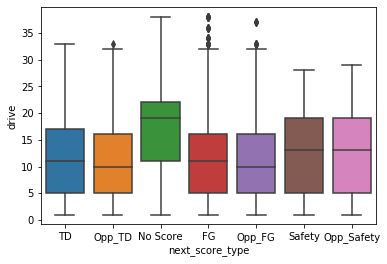

In [58]:
sns.boxplot(x='next_score_type', y='drive', data=df)

Again Drive shows a similar distribution as half_seconds_remaining, No Score events are more likely to occur near the end of games (as time is being run out). Similarly Safety's are less likely to occur at the beginning of games likely do to the field position battle taking time to pin a team deep.

    - Possible Feature to engineer is drive starting position
    - Turnover on previous drive
    


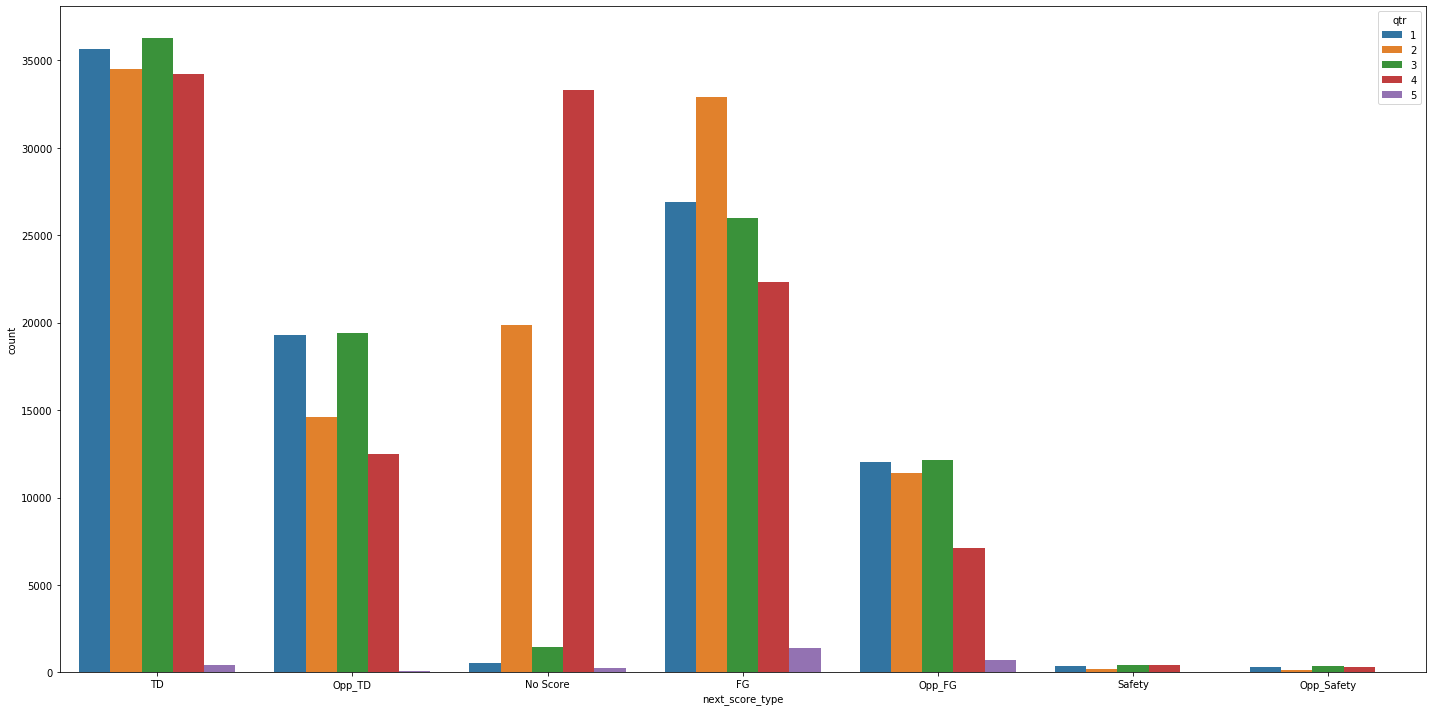

In [100]:
#Chart for the number of each scoring type by qtr:
plt.figure(figsize=(20,10))
sns.countplot(x='next_score_type',data=df,hue='qtr')
plt.tight_layout()

The actual qtr is important because the half seconds remaining does not capture the difference between the 2nd quarter and 4th. Where No Scores are more likely

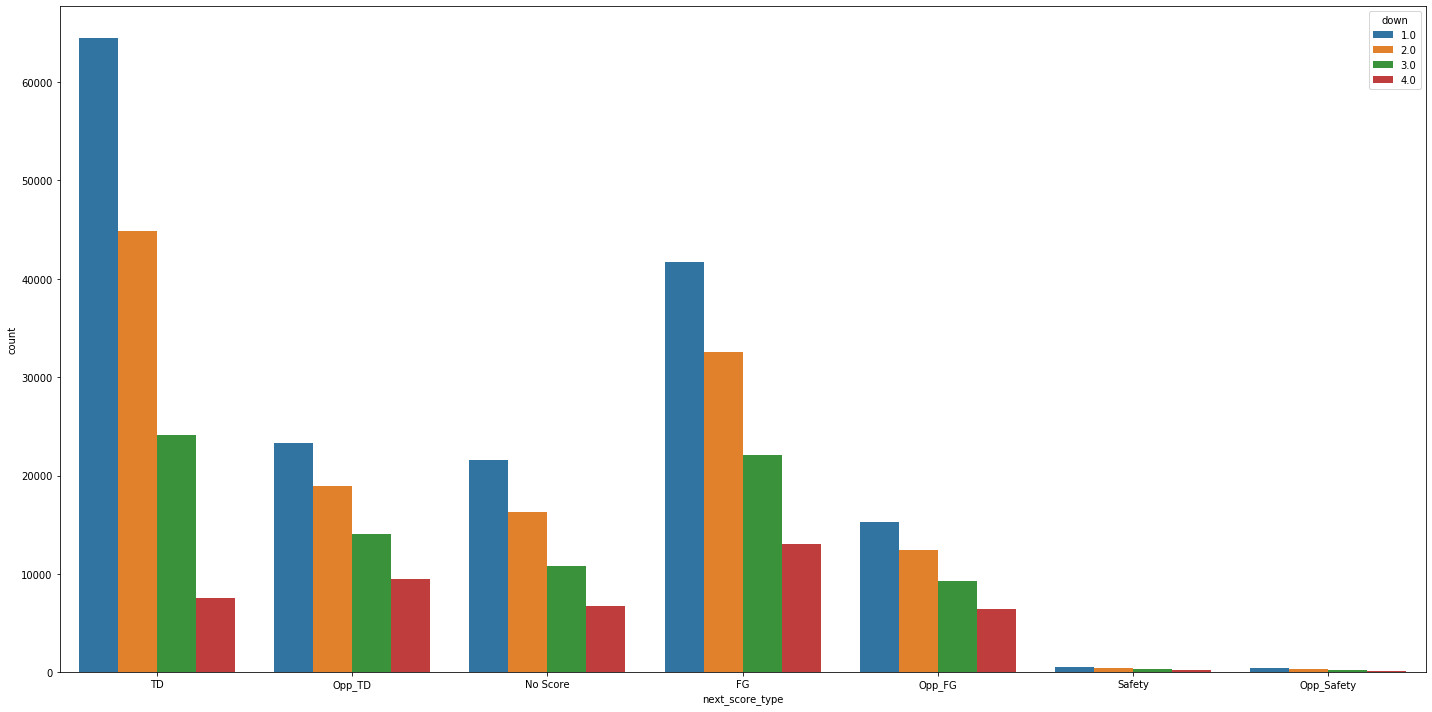

In [101]:
#Chart for the number of each scoring type by qtr:
plt.figure(figsize=(20,10))
sns.countplot(x='next_score_type',data=df,hue='down')
plt.tight_layout()

Down clearly effects the distribution of score type

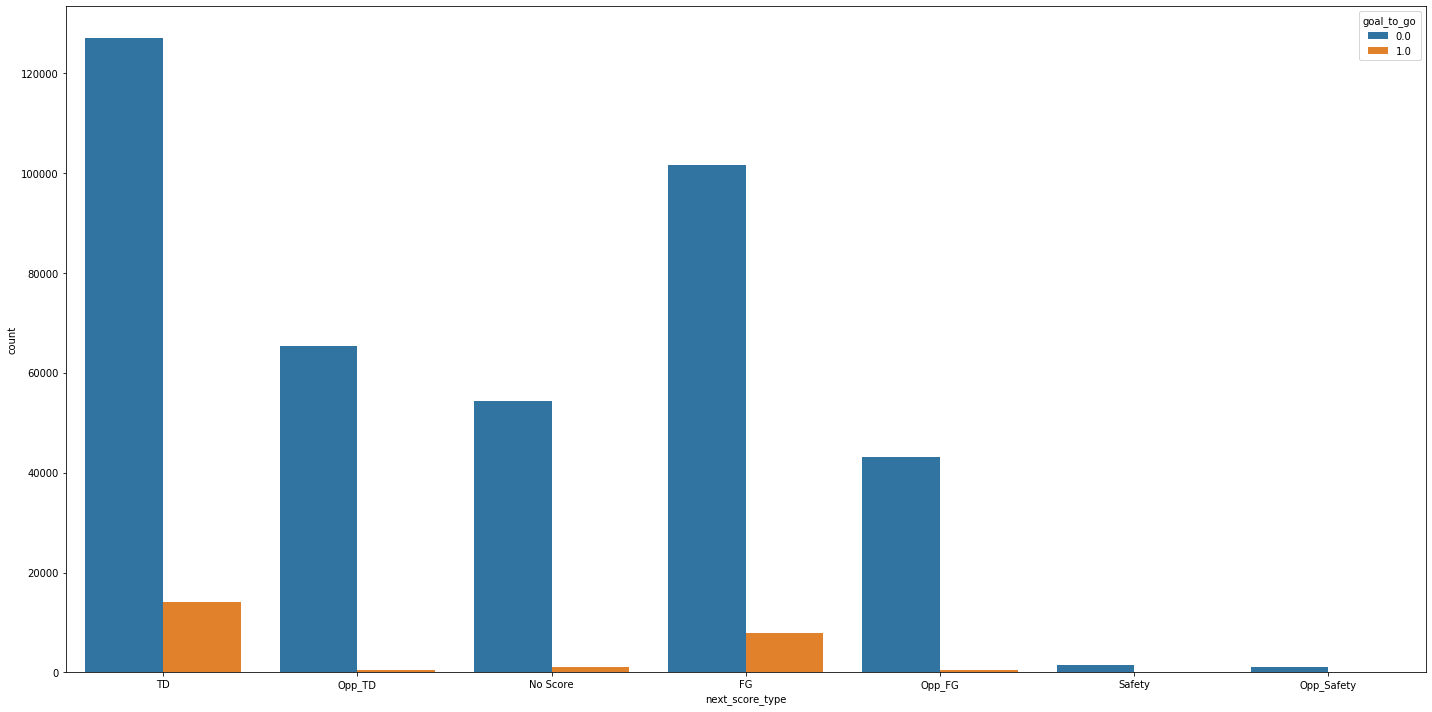

In [102]:
#Chart for the number of each scoring type by qtr:
plt.figure(figsize=(20,10))
sns.countplot(x='next_score_type',data=df,hue='goal_to_go')
plt.tight_layout()

Goal to go shows clear distinction between the classes

### Feature Selection

In [56]:
df['quarter_end']

0         0
1         0
2         0
3         0
4         0
         ..
417853    0
417854    0
417855    0
417856    0
417857    0
Name: quarter_end, Length: 417858, dtype: int64